In [2]:
import os
import csv
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure

## Helper functions to load and process original csv files

In [23]:
# this function load one .cvs (a sequence)
def load_data(dataset, csv_folder='./NAB-known-anomaly/csv-files/'):
	if dataset == 'wind_power':
		data_file = os.path.join(csv_folder, 'wind_power_mini.csv')
		anomalies = ['2013-12-22 20:00:00', '2014-04-13 09:00:00']
		t_unit = '10 min'

	t = []
	readings = [] 
	idx_anomaly = []
	i = 0
	with open(data_file) as csvfile:
		readCSV = csv.reader(csvfile, delimiter=',')
		print("\n--> Anomalies occur at:")
		for row in readCSV:
			if i > 0:
				t.append(i)
				#print(row[1:10])
				readings.append([float(x) if x!="" else 0 for x in row[1:11]])
				if int(row[11]) == 0:
					idx_anomaly.append(i)
					#print("  timestamp #{}: {}".format(j, row[0]))
			i = i + 1
	t = np.asarray(t)
	readings = np.asarray(readings)
	print("\nOriginal csv file contains {} timestamps.".format(t.shape))
	print("Processed time series contain {} readings.".format(readings.shape))
	print("Anomaly indices are {}".format(idx_anomaly))
	
	return t, t_unit, readings, idx_anomaly

In [21]:
# This function plots a dataset with the train/test split and known anomalies
# Relies on helper function load_data()

def process_and_save_specified_dataset(dataset, idx_split, y_scale=5, save_file=False):
	t, t_unit, readings, idx_anomaly = load_data(dataset)
	
	# split into training and test sets
	training = readings[idx_split[0]:idx_split[1]]
	t_train = t[idx_split[0]:idx_split[1]]
	
	# normalise by training mean and std 
	train_m = np.mean(training)
	train_std = np.std(training)
	print("\nTraining set mean is {}".format(train_m))
	print("Training set std is {}".format(train_std))
	readings_normalised = (readings - train_m) / train_std
	
	training = readings_normalised[idx_split[0]:idx_split[1]]
	if idx_split[0] == 0:
		test = readings_normalised[idx_split[1]:]
		t_test = t[idx_split[1]:] - idx_split[1]
		idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]
	else:
		test = [readings_normalised[:idx_split[0]], readings_normalised[idx_split[1]:]]
		t_test = [t[:idx_split[0]], t[idx_split[1]:] - idx_split[1]]
		idx_anomaly_split = np.squeeze(np.argwhere(np.asarray(idx_anomaly)>idx_split[0]))
		idx_anomaly_test = [np.asarray(idx_anomaly[:idx_anomaly_split[0]]), 
							np.asarray(idx_anomaly[idx_anomaly_split[0]:]) - idx_split[1]]
	print("Anomaly indices in the test set are {}".format(idx_anomaly_test))
	
	if save_file:
		save_dir = '../datasets/NAB-known-anomaly/'
		np.savez(save_dir+dataset+'.npz', t=t, t_unit=t_unit, readings=readings, idx_anomaly=idx_anomaly,
					idx_split=idx_split, training=training, test=test, train_m=train_m, train_std=train_std,
					t_train=t_train, t_test=t_test, idx_anomaly_test=idx_anomaly_test)
		print("\nProcessed time series are saved at {}".format(save_dir+dataset+'.npz'))
	else:
		print("\nProcessed time series are not saved.")
	
	# plot the whole normalised sequence
	fig, axs = plt.subplots(1, 1, figsize=(18, 4), edgecolor='k')
	fig.subplots_adjust(hspace=.4, wspace=.4)
	# axs = axs.ravel()
	# for i in range(4):
	axs.plot(t, readings_normalised)
	if idx_split[0] == 0:
		axs.plot(idx_split[1]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	else:
		for i in range(2):
			axs.plot(idx_split[i]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	for j in range(len(idx_anomaly)):
		axs.plot(idx_anomaly[j]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'r--')
	#     axs.plot(data[:,1])
	axs.grid(True)
	axs.set_xlim(0, len(t))
	axs.set_ylim(-y_scale, y_scale)
	axs.set_xlabel("timestamp (every {})".format(t_unit))
	axs.set_ylabel("normalised readings")
	axs.set_title("{} dataset\n(normalised by train mean {:.2f} and std {:.2f})".format(dataset, train_m, train_std))
	axs.legend(('data', 'train test set split', 'anomalies'))
	
	return t, readings_normalised

## Example on ambient temperature series


--> Anomalies occur at:

Original csv file contains (9357,) timestamps.
Processed time series contain (9357, 10) readings.
Anomaly indices are [5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 514

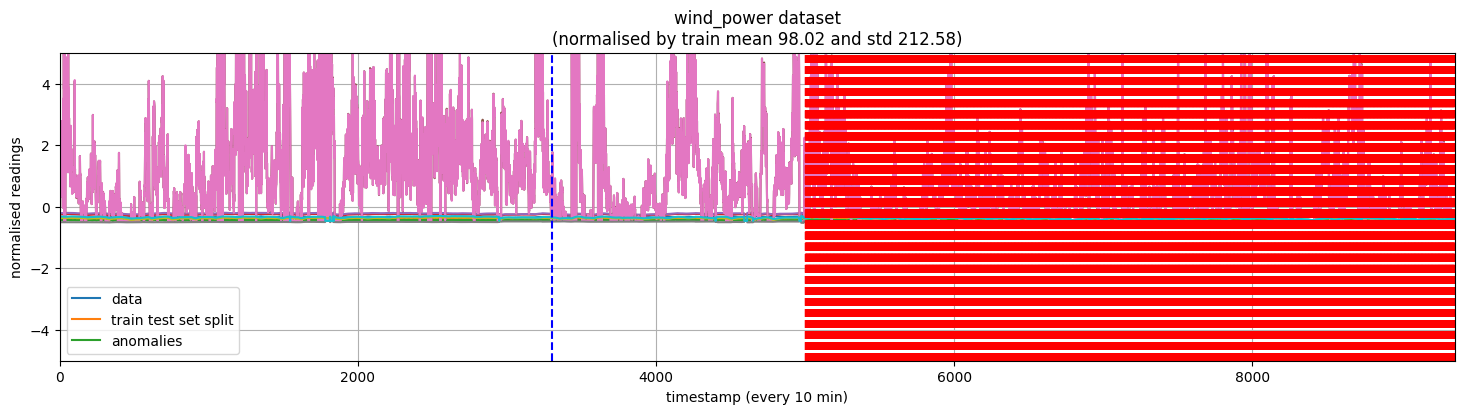

In [24]:
dataset = 'wind_power'
idx_split = [0,3300]

t, readings_normalised = process_and_save_specified_dataset(dataset, idx_split,save_file=True)